# Fitting functions to data
Fitting a function to data can be challenging, we will be using a packaged function to do so.

## Fitting basics

In [17]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pwlf
%matplotlib notebook

X,y=np.loadtxt("Data/KIC006922244_phaseFold.dat",unpack=True)

my_pwlf = pwlf.PiecewiseLinFit(X, y)
breaks = my_pwlf.fit(5)

print(breaks)

y_hat = my_pwlf.predict(X)

[-1.7611826  -0.06376906 -0.03168248  0.04379799  0.07619626  1.7611565 ]


<IPython.core.display.Javascript object>


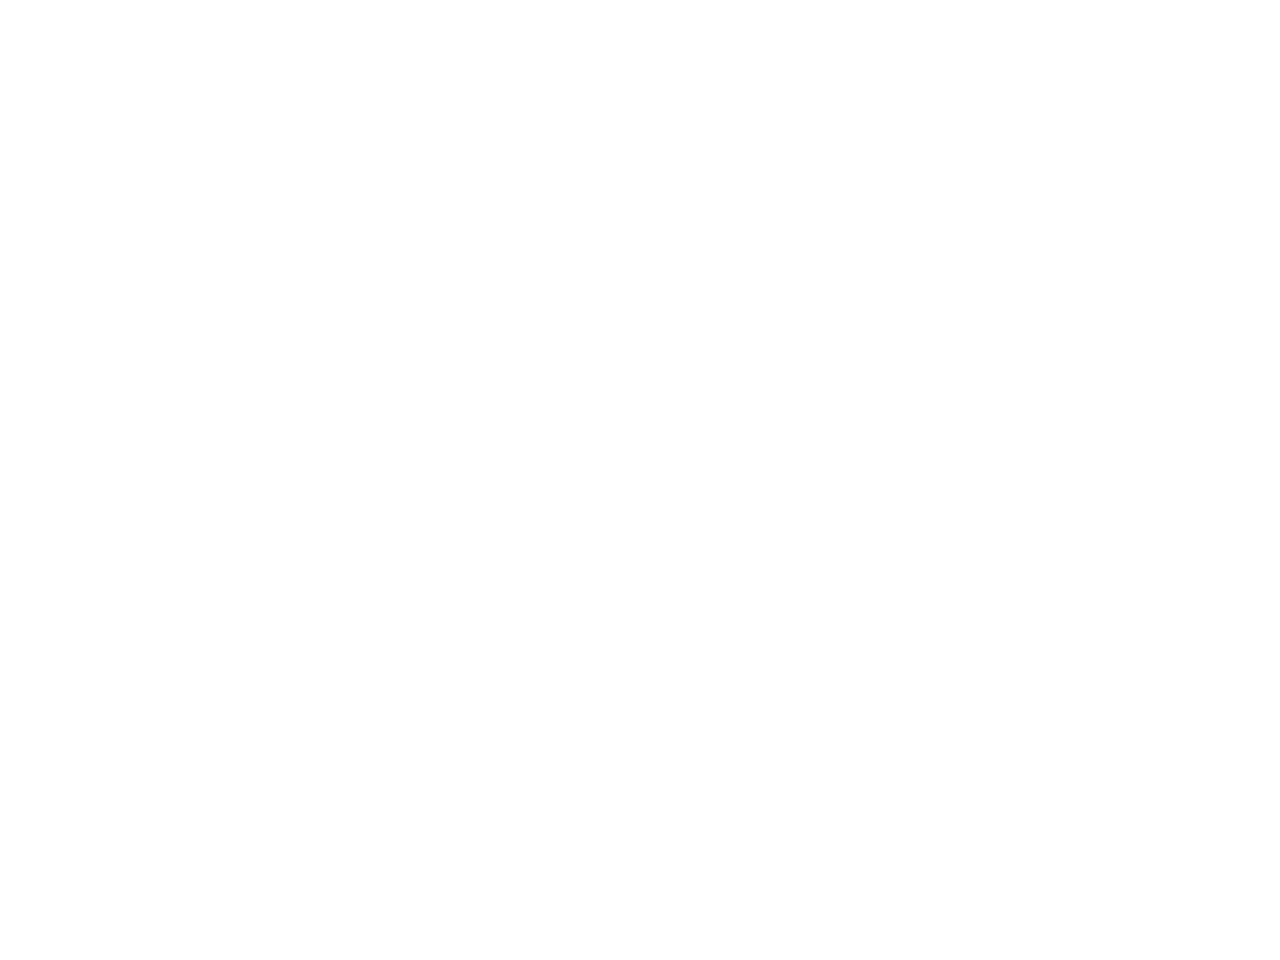

<function matplotlib.pyplot.show(*args, **kw)>

In [18]:
plt.figure()
plt.plot(X, y, "o")
plt.plot(X, y_hat,".",markersize=1)
plt.show

In [19]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pwlf
%matplotlib notebook

X,y=np.loadtxt("Data/KIC006922244_phaseFold.dat",unpack=True)

def piecewise_linear(x, x0,x1,x2,x3,depth, k):
    return np.piecewise(x, [x < x0,(x>x0)&(x<x1),(x>x1)&(x<x2),(x>x2)&(x<x3)], [lambda x:0,lambda x:k*x -x0*k, lambda x:depth,lambda x:-k*x +x3*k,lambda x:0])

p , e = optimize.curve_fit(piecewise_linear, X, y)




/Users/fra/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


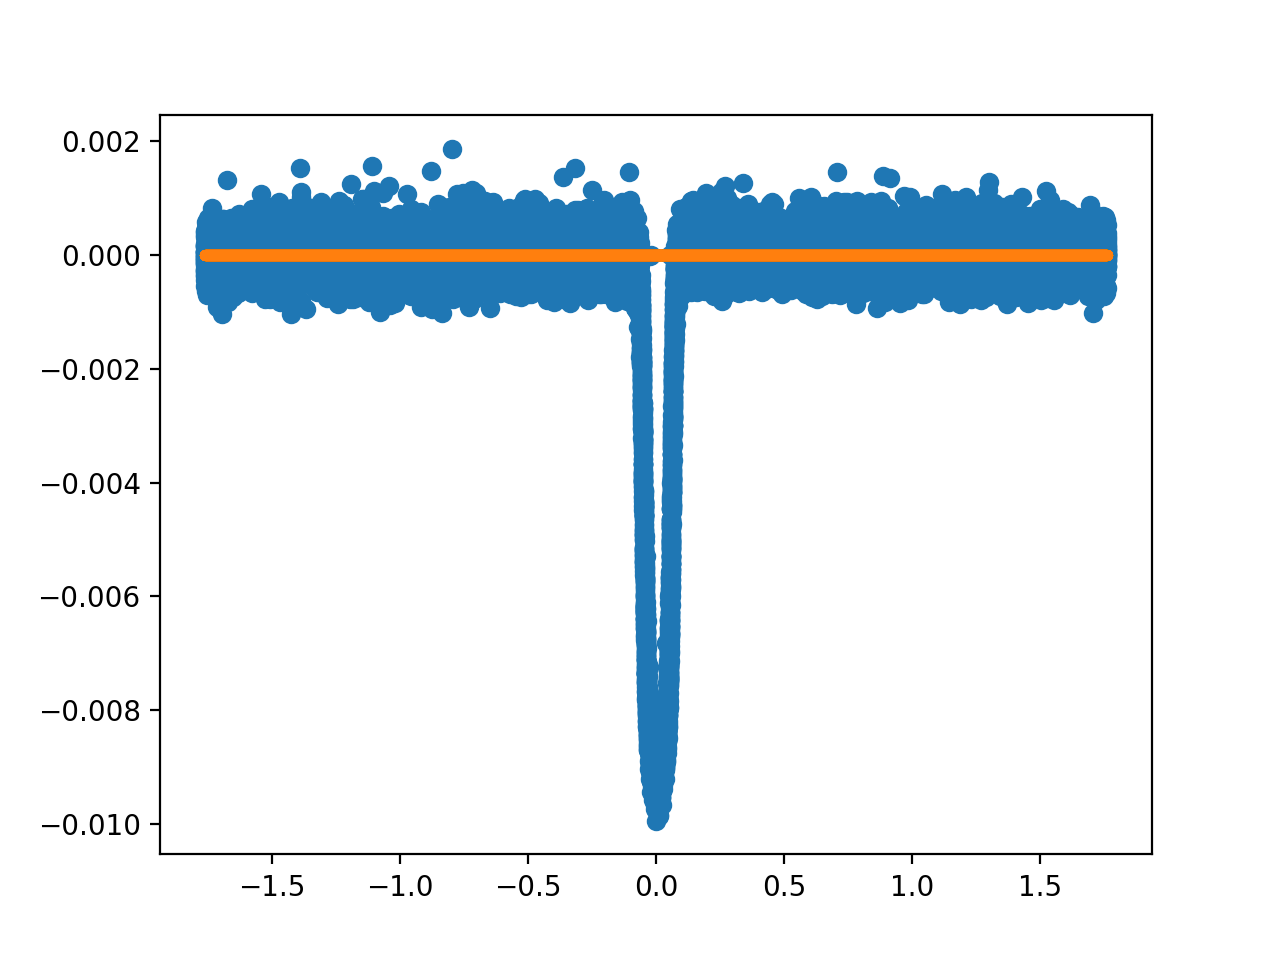

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
plt.figure()
plt.plot(X, y, "o")
plt.plot(X, piecewise_linear(X, *p),".")
plt.show